In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters

## Fonctions

In [2]:
def e_greedy(state, epsilon, q, env):
    exp_exp_tradeoff = random.uniform(0, 1)
    if exp_exp_tradeoff > epsilon:
        return np.argmax(q[state, :])
    return env.action_space.sample()


def maj_q(q_local, state, action, new_state, reward, learning_rate, gamma):
    q_init = q_local[state, action]
    max_state = np.max(q_local[new_state, :])
    q_local[state, action] = (1 - learning_rate) * q_init + learning_rate * (reward + gamma * max_state)
    return q_local

def is_fractile(episode_actuel, episode_total):
    return episode_actuel % (episode_total/50) == 0

def show_q(local_q):
    env = gym.make("Taxi-v3", render_mode="human")
    state = env.reset()[0]
    for step in range(200):
        env.render()
        action = np.argmax(local_q[state, :])
        (new_state, reward, done, info, _) = env.step(action)
        if done:
            break
        state = new_state
    env.close()

# Renforcement

In [38]:
def train(epsilon = 1.0, max_steps = 200, alpha = 0.7, gamma = 0.95, max_epsilon = 1.0, min_epsilon = 0.01, decay_rate = 0.01, total_episodes = 750, total_test_episodes = 1):
    title = "Decay rate: {}, alpha: {}, gamma: {} ".format(decay_rate, alpha, gamma)
    env = gym.make("Taxi-v3", render_mode="ansi")
    env.reset()
    action_size = env.action_space.n
    state_size = env.observation_space.n
    q = np.zeros((state_size, action_size))
    rewards = []
    for i in range(0, 50):
        print('=', end= '')
    print()
    for episode in range(total_episodes):
        if is_fractile(episode, total_episodes):
            print("\b=>", end='')
        (state) = env.reset()[0]
        count = 0
        for step in range(max_steps):
            action = e_greedy(state, epsilon, q, env)
            (new_state, reward, done, info, _) = env.step(action)
            q = maj_q(q, state, action, new_state, reward, alpha, gamma)
            state = new_state
            count += reward
            if done:
                rewards.append(count)
                break
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    plt.title(title)
    plt.plot(rewards, color="red")
    plt.show()
    env = gym.make("Taxi-v3", render_mode="ansi")
    env.reset()

    for episode in range(total_test_episodes):
        state = env.reset()[0]
        total_rewards = 0
        for step in range(max_steps):
            env.render()
            action = np.argmax(q[state, :])
            (new_state, reward, done, info, _) = env.step(action)
            total_rewards += reward
            if done:
                break
            state = new_state
    env.close()
    return q

Nous allons étudier l'effet des différents hyperparamètres sur les résultats obtenus. 


### Gamma

Cet hyperparamètre définit l'importance des futurs rewards sur le choix de la prochaine action. Si gamma est proche de 0, l'agent ne considerera que les récompenses immédiates. A l'inverse, si gamma est proche de 1, il sera capable de faire abstraction de la récompense à venir si les récompenses futures sont plus intéressantes. 

==================================================>

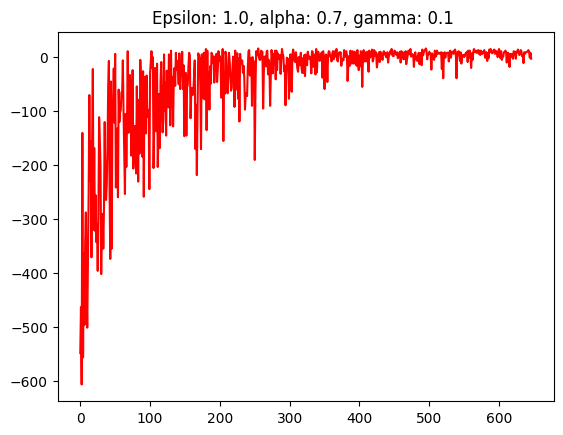

==================================================>

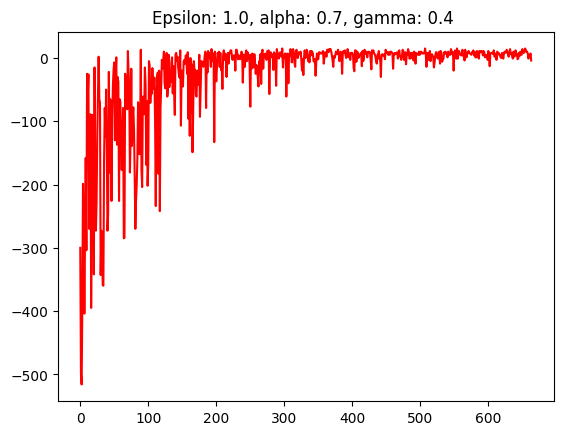

==================================================>

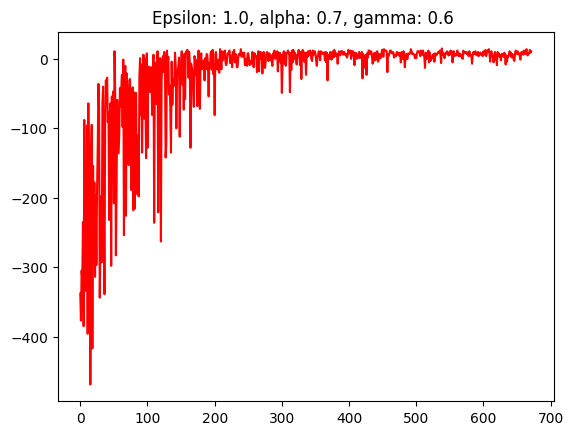

==================================================>

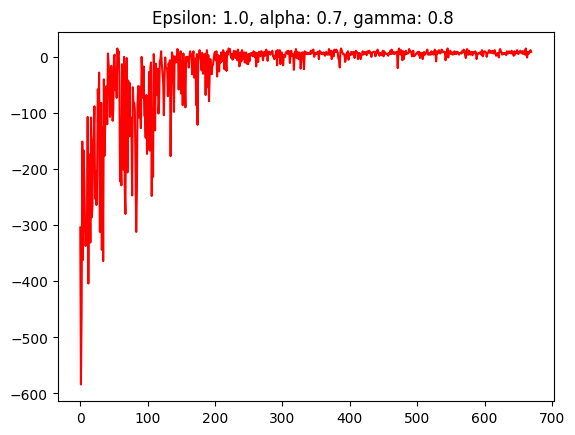

==================================================>

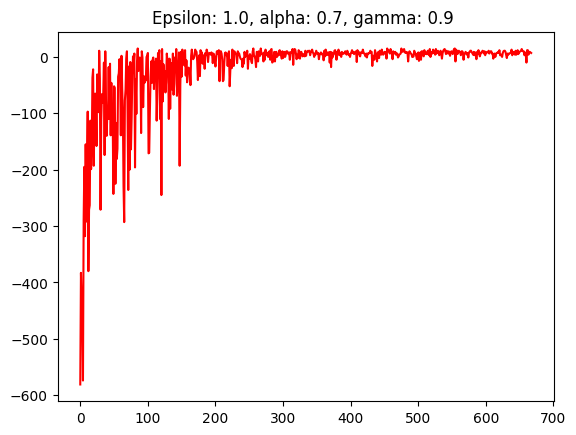

==================================================>

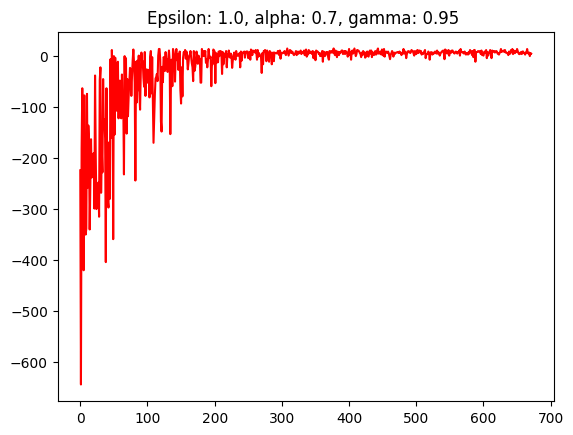

In [30]:
q = train(gamma=0.1)
q = train(gamma=0.4)
q = train(gamma=0.6)
q = train(gamma=0.8)
q = train(gamma=0.9)
q = train(gamma=0.95)

On observe sur les résultats ci-dessus que gamma influence la vitesse de stabilisation des résultats. En effet, plus gamma est élevé, plus l'agent apprend rapidement de son environnement. Il faut un peu moins de 400 itérations pour que le résultat se stabilise avec gamma = 0.6 alors que, pour gamma = 0.95, il faut environ 250 itérations.


### Alpha

Cet hyperparamètre permet de controler la vitesse d'apprentissage du programme. Alpha permet de determiner le poids que l'on donne aux expériences précédentes lors de la mise à jour des q-values. 

==================================================>

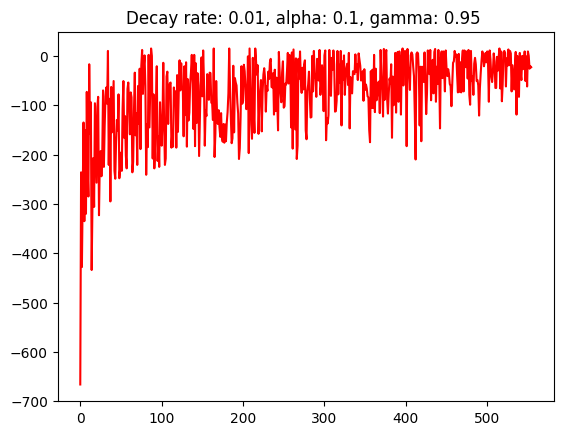

==================================================>

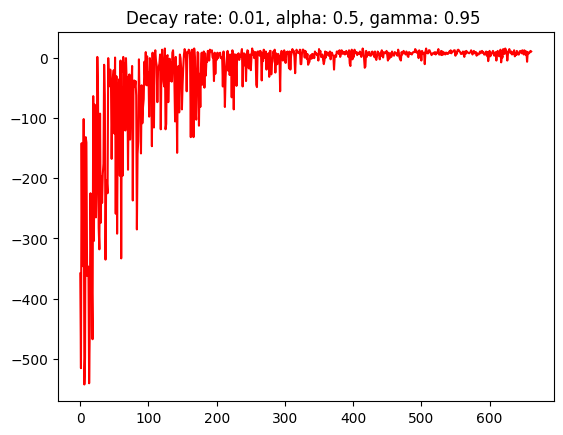

==================================================>

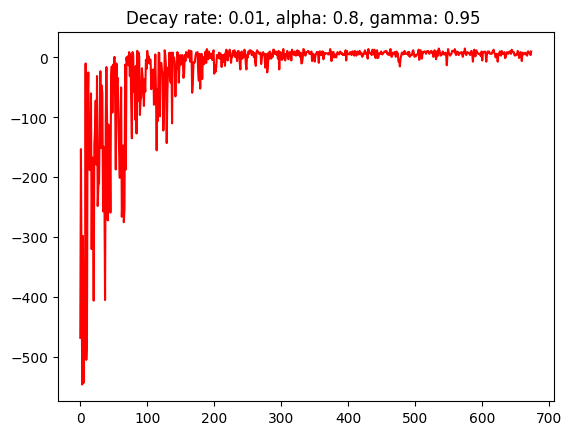

In [52]:
q = train(alpha=0.1)
q = train(alpha=0.5)
q = train(alpha=0.8)



On remarque que plus alpha est élevée, plus l'agent apprend rapidement des étapes précédentes. 

### Epsilon

Epsilon est l'hyperparamètre qui permet de déterminer l'action sélectionnée par l'agent. Si epsilon est grand, il y a plus de chance que l'agent choisisse une action de manière aléatoire. Si epsilon est petit, l'agent choisira la meilleure action par rapport aux q-values qu'il a déjà obtenu.  
Ici, nous allons étudier l'influence de la vitesse de décroissance de epsilon sur l'apprentissage de l'agent. 

==================================================>

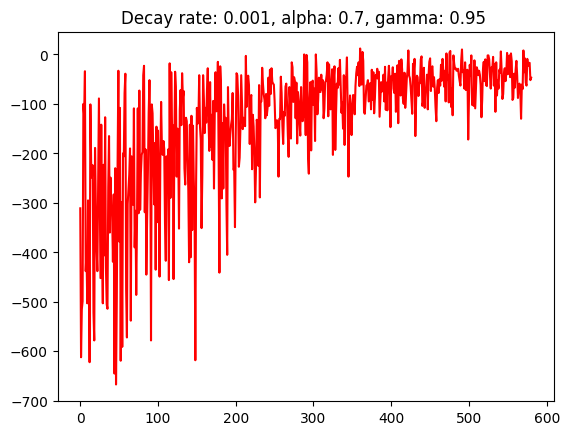

==================================================>

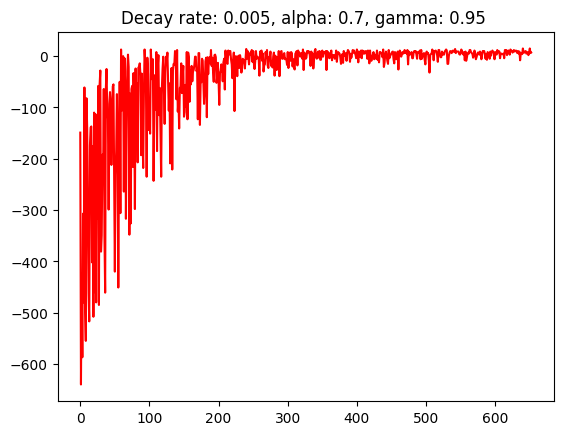

==================================================>

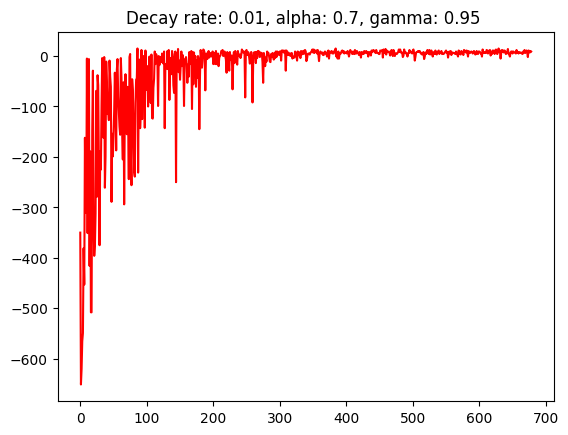

==================================================>

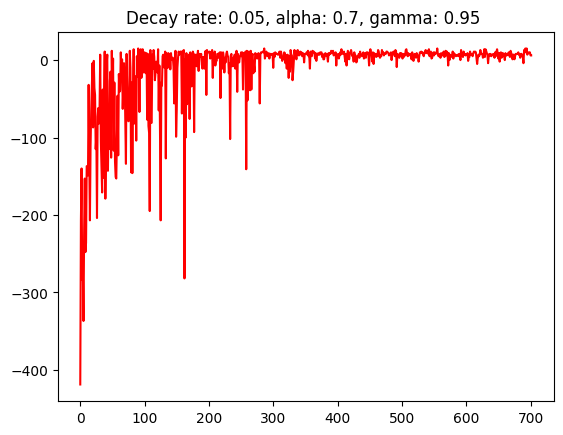

==================================================>

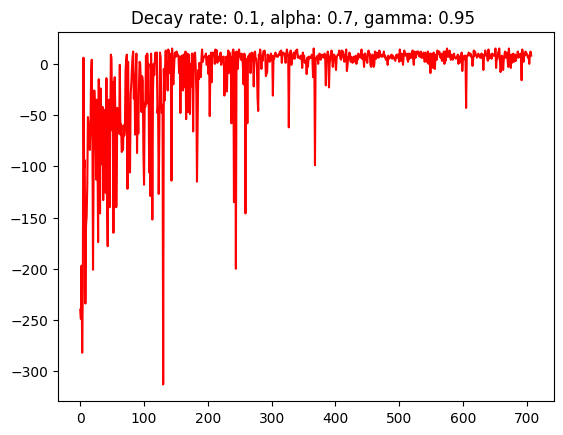

==================================================>

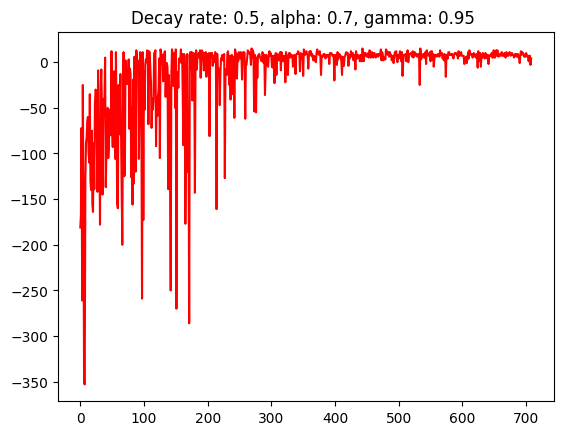

In [41]:
q = train(decay_rate=0.001) 
q = train(decay_rate=0.005)
q = train(decay_rate=0.01)
q = train(decay_rate=0.05)
q = train(decay_rate=0.1)
q = train(decay_rate=0.5)

On observe que lorsque la vitesse de décroissante est très basse, l'agent a du mal à apprendre car, epsilon restant élevé, il va selectionner des actions aléatoirement, sans prendre compte de ce qu'il a déjà appris lors des itérations précédentes. Par contre, on remarque que si la vitesse de décroissance est trop élevée, l'agent n'obtient pas des résultats optimaux car il n'a pas eu le temps d'explorer les différentes options qui lui sont possibles.  
On se rend compte qu'une vitesse de décroissance de 0.01 permet à l'agent d'avoir une phase d'exploration des différents états puis, une phase d'exploitation des résultats obtenus grace à cette exploration. 